This notebook graphs the growth of stock prices and real estate prices over years, with USA and Japan as two examples. It illustrates that the the comparison between returns of stock and real estate investments can differ in regards to both country and time period.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
directory = '../data'
assets = pd.ExcelFile(directory + '/JSTassetsR3.xlsx').parse('Data')
assets_filtered = assets.dropna()

In [59]:
assets_usa = assets_filtered[assets_filtered['country'] == 'USA']
assets_japan = assets_filtered[assets_filtered['country'] == 'Japan']

The stock and home price indices given in the data are normalized to 1990 but to visualize the growth more intuitively we normalize them to the first data point in the respective time series.

In [60]:
assets_usa['home_price_normalized'] = assets_usa['hpnom'] / assets_usa.iloc[0]['hpnom']
assets_usa['stock_price_normalized'] = assets_usa['stocks'] / assets_usa.iloc[0]['stocks']
assets_japan['home_price_normalized'] = assets_japan['hpnom'] / assets_japan.iloc[0]['hpnom']
assets_japan['stock_price_normalized'] = assets_japan['stocks'] / assets_japan.iloc[0]['stocks']

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

Text(0.5,1,'Japan stock and real estate growth')

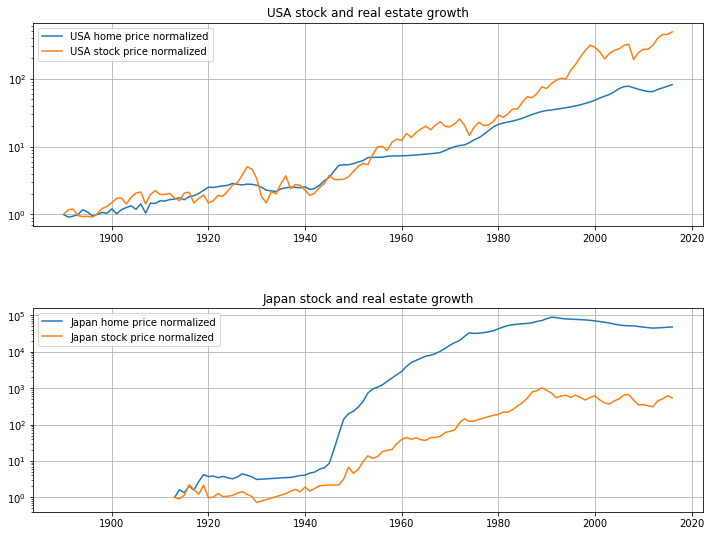

In [61]:
fig = plt.figure(figsize = (12, 9))
plt.subplots_adjust(hspace = 0.4)
ax1 = plt.subplot(211)
ax1.plot(assets_usa['year'], assets_usa['home_price_normalized'], label = 'USA home price normalized')
ax1.plot(assets_usa['year'], assets_usa['stock_price_normalized'], label = 'USA stock price normalized')
ax1.legend()
ax1.set_yscale('log')
ax1.grid()
ax1.set_title('USA stock and real estate growth')
ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(assets_japan['year'], assets_japan['home_price_normalized'], label = 'Japan home price normalized')
ax2.plot(assets_japan['year'], assets_japan['stock_price_normalized'], label = 'Japan stock price normalized')
ax2.legend()
ax2.set_yscale('log')
ax2.grid()
ax2.set_title('Japan stock and real estate growth')

As we can see, the long term growth of stocks is better than real estate in USA, while real estate beats stocks in Japan. On the other hand, within each country separately, there are also time periods where the long-term relationship does not hold. Therefore it would be interesting to study whether there are factors that lead to such difference between countries, as well as temporal fluctuations in each country itself.